In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

# Setting Styles

In [3]:
# Setting Styles
plt.style.use('classic')
# To list all available styles, use:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Plotting from the notebook

Plotting interactively within an IPython notebook can be done if you specify Matplotlib mode. To enable this mode, you can use the %matplotlib magic command after starting ipython:
* %matplotlib notebook will lead to interactive plots embedded within the notebook
* %matplotlib inline will lead to static images of your plot embedded in the notebook

it needs to be done only once per kernel/session

In [4]:
%matplotlib inline

# Terms

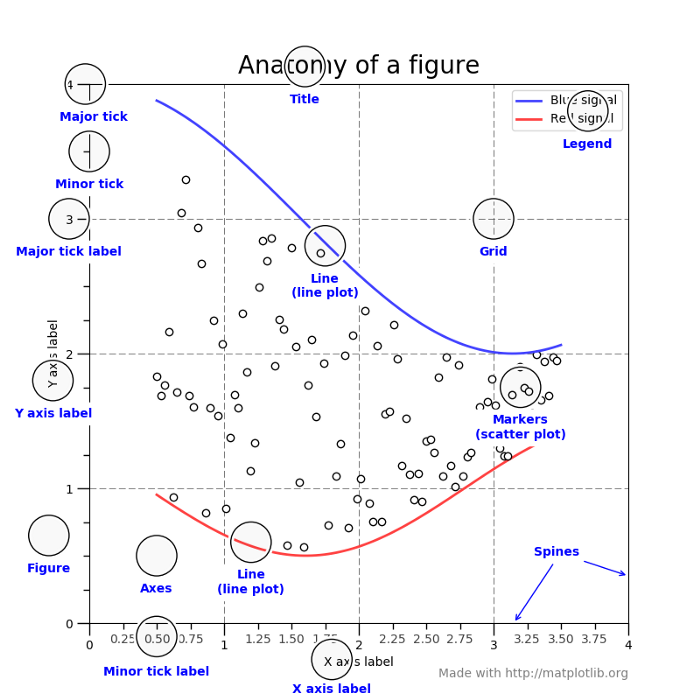

In [5]:
# how to load a URL in python -- stack overflow -- PIL package
import requests as re
def download_image(url):
    image = Image.open(re.get(url, stream=True).raw) # take in the image URL
    return image # spit out the image

download_image(url = 'https://miro.medium.com/max/700/1*WB-lBi9VbCQxPHNjM7mXIQ.png')

# Figure (i.e. the canvas)

* The whole figure. The figure keeps track of all the child Axes, a smattering of ‘special’ artists (titles, figure legends, etc), and the canvas.
* A figure can have any number of Axes, but to be useful should have at least one.
* The easiest way to create a new figure is with pyplot:

<Figure size 432x288 with 0 Axes>

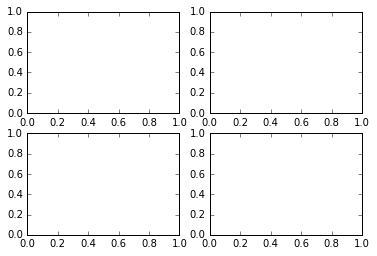

In [6]:
fig = plt.figure()  # an empty figure with no axes
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

# Axes (i.e. each graph)

* The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system.
* The Axes class and it’s member functions are the primary entry point to working with the OO interface.
* A given figure can contain many Axes, but a given Axes object can only be in one Figure.
* The Axes contains two (or three in the case of 3D) Axis objects which take care of the data limits
* The data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods.
* Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel().

# Axis

* These are the number-line-like objects.
* They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks).

# Artist

* Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects).
* When the figure is rendered, all of the artists are drawn to the canvas.

# Types of inputs to plotting functions

All of plotting functions expect np.array or np.ma.masked_array as input. Classes that are ‘array-like’ such as pandas data objects and np.matrix may or may not work as intended. It is best to convert these to np.array objects prior to plotting.

In [7]:
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a.values
#output: array([[0.69249144, 0.14049831, 0.48518893, 0.70071801, 0.57683582],
#              [0.7216881 , 0.55435044, 0.68774926, 0.31180173, 0.85159178],
#              [0.74072171, 0.11777016, 0.26252409, 0.52488437, 0.46330762],
#             [0.43196313, 0.91133141, 0.83722142, 0.41598821, 0.61068865]])
b = np.matrix([[1,2],[3,4]])
np.asarray(b)
#output: array([[1, 2],
#              [3, 4]])

array([[1, 2],
       [3, 4]])

# Stateful vs stateless approach
matplotlib has dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface.

### 1. Stateful example:
There is only ever one Figure or Axes that you’re manipulating at a given time, and you don’t need to explicitly refer to it.
The stateful interface makes its calls with `plt.plot()` and other top-level pyplot functions.
The MATLAB-style/stateful approach related tools are contained in the pyplot (plt) interface.
It is important to note that this interface is stateful: it keeps track of the “current” figure and axes, which are where all plt commands are applied.

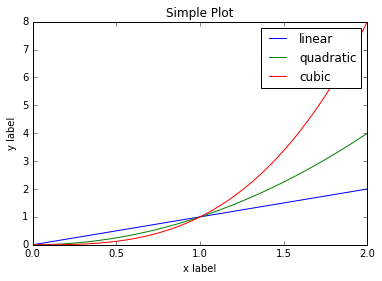

In [8]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

* Calling plt.plot() is just a convenient way to get the current Axes of the current Figure and then call its plot() method.
* This is what is meant by the assertion that the stateful interface always “implicitly tracks” the plot that it wants to reference.
* pyplot is home to a batch of functions that are really just wrappers around matplotlib’s object-oriented interface
* Calling plt.title() gets translated into this one line: gca().set_title(s, *args, **kwargs).
* Similarly, if you look at the source for top-level functions like plt.grid(), plt.legend(), and plt.ylabels(), you’ll notice that all of them follow the same structure of delegating to the current Axes with gca() and then calling some method of the current Axes.

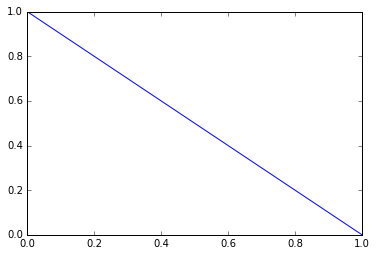

In [9]:
plt.plot([0,1], [1,0])

Changing size of figure

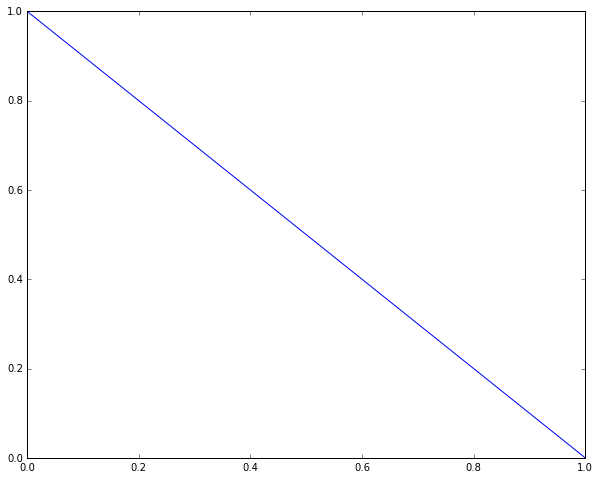

In [10]:
plt.plot([0,1], [1,0])
plt.gcf().set_size_inches([10,8])

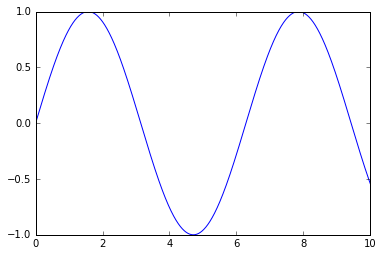

In [11]:
# np.linspace return evenly spaced numbers over a specified interval.
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x))

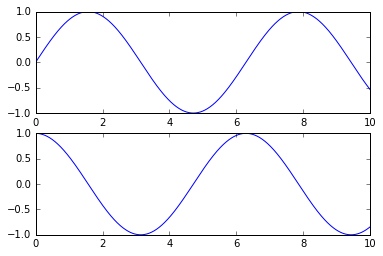

In [12]:
# another example: subplot

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

### 2. stateless (or rather object-oriented approach):
* Modifying the underlying objects directly is the object-oriented approach.
* thus we take the object references into variables ( fig, ax, li ).
* and call plotting functions that are methods of explicit Figure and Axes objects

this approach is more customizable and comes handy as graphs become more complex.

The only time that the OO approach uses pyplot, to create a Figure and Axes:

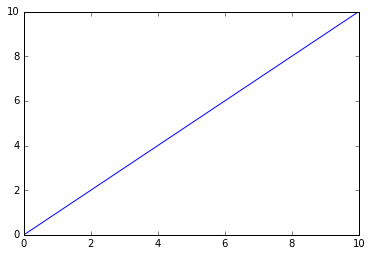

In [13]:
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fig = plt.figure()
ax = plt.axes()
line = ax.plot(data)

what does argument in fig.add_subplot(111) mean?
These are subplot grid parameters encoded as a single integer. For example, “111” means “1x1 grid, first subplot” and “234” means “2x3 grid, 4th subplot”.
Alternative form for add_subplot(111) is add_subplot(1, 1, 1).

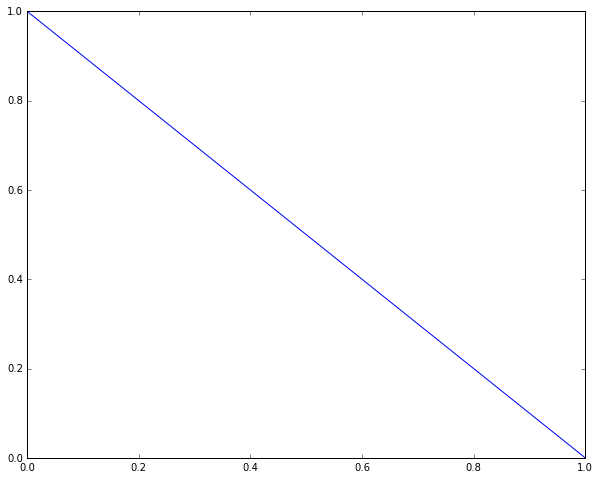

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
li = ax.plot([0,1], [1,0])
fig.set_size_inches([10, 8])

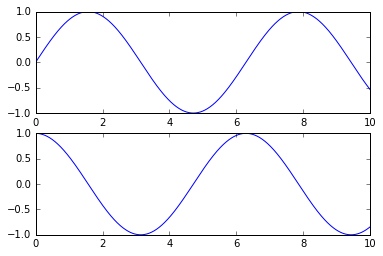

In [15]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

# Saving Plots as images

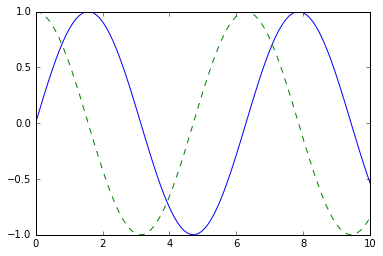

In [16]:
# np.linspace return evenly spaced numbers over a specified interval.
x = np.linspace(0, 10, 100)
# create a plot figure
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the `savefig()`command. For example, to save the previous figure as a PNG file, you can run this:

In [17]:
fig.savefig('my_figure.png')

To confirm that it contains what we think it contains, let’s use the IPython Image object to display the contents of this file:

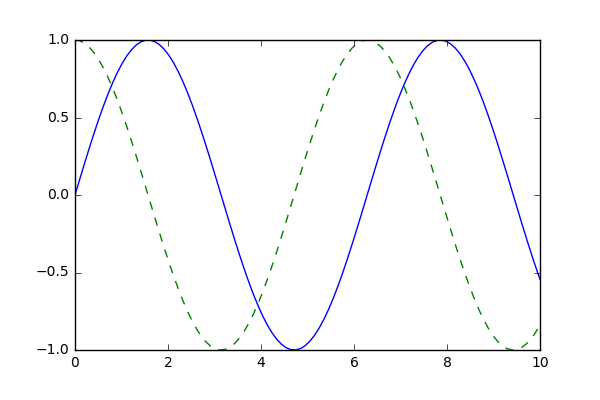

In [18]:
from IPython.display import Image
Image('my_figure.png')

# Basics


For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows:
* The purpose of using plt.figure() is to create a figure object.
* The whole figure is regarded as the figure object.
* It is necessary to explicitly use plt.figure() when we want to tweak the size of the figure and when we want to add multiple Axes objects in a single figure.

<Figure size 432x288 with 0 Axes>

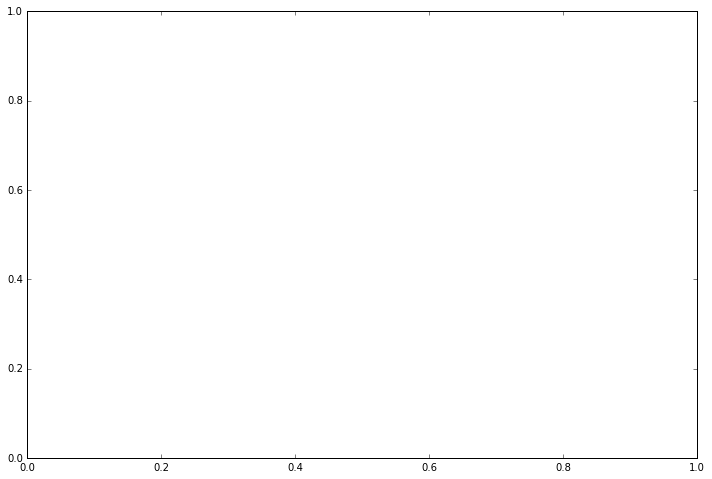

In [19]:
fig = plt.figure() # default size
fig = plt.figure(figsize=(12,8)) # specific 

#output: <Figure size 432x288 with 0 Axes>
#output: <Figure size 864x576 with 0 Axes>


# Add an axes to the current figure and make it the current axes.
ax = plt.axes()

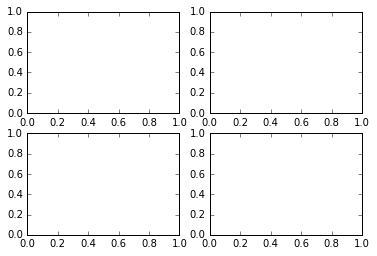

In [20]:
fig, ax_lst = plt.subplots(2, 2)

In [22]:
#so we'll be having list of axes we just created

ax_lst

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

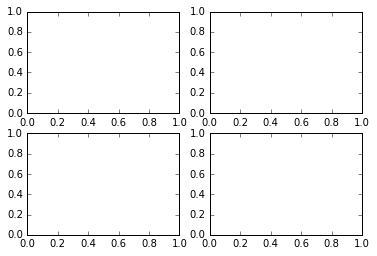

In [23]:
# alternatively we can get it explicitly as follows:
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# `plt.show()` will display current figure you are working on

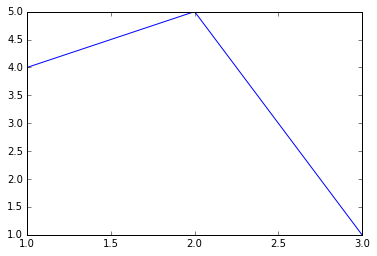

In [24]:
plt.plot([1,2,3],[4,5,1])
plt.show()

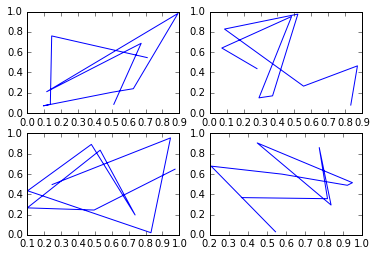

In [25]:
x1 = np.random.rand(10)
x2 = np.random.rand(10)
x3 = np.random.rand(10)
x4 = np.random.rand(10)
y1 = np.random.rand(10)
y2 = np.random.rand(10)
y3 = np.random.rand(10)
y4 = np.random.rand(10)

figure2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(x1,y1)
ax2.plot(x2,y2)
ax3.plot(x3,y3)
ax4.plot(x4,y4)

plt.show()

# `plt.draw()` will re-draw the figure

* This is used in interactive mode to update a figure that has been altered using one or more plot object method calls;
* it is not needed if figure modification is done entirely with pyplot functions, if a sequence of modifications ends with a pyplot function, or if matplotlib is in non-interactive mode and the sequence of modifications ends with show() or savefig().

This seems to suggest that using plt.draw() before plt.show() when not in interactive mode will be redundant the vast majority of the time. The only time you may need it is if you are doing some very strange modifications that don’t involve using pyplot functions.

# Common Use Cases

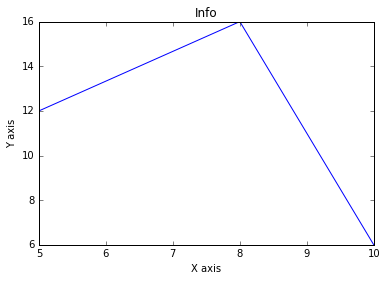

In [26]:
x=[5,8,10]
y=[12,16,6]
plt.plot(x,y)
plt.title('Info')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

# Style

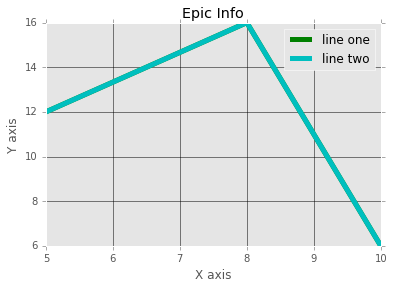

In [27]:
plt.style.use('ggplot')
x=[5,8,10]
y=[12,16,6]
x2=[6,9,11]
y2=[6,15,7]
plt.plot(x,y, 'g',label='line one',linewidth=5)
plt.plot(x,y,'c',label='line two',linewidth=5)
plt.title('Epic Info')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True,color='k')
plt.show()

# Bar Graph

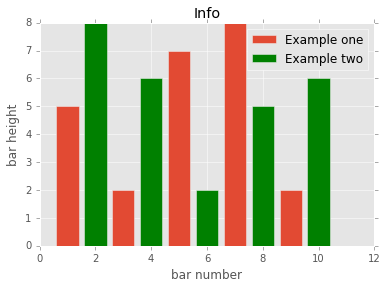

In [28]:
plt.bar([1,3,5,7,9],[5,2,7,8,2], label= 'Example one')
plt.bar([2,4,6,8,10],[8,6,2,5,6], label= 'Example two',color='g')
plt.legend()
plt.title('Info')
plt.xlabel('bar number')
plt.ylabel('bar height')
plt.show()

# Histogram

No handles with labels found to put in legend.


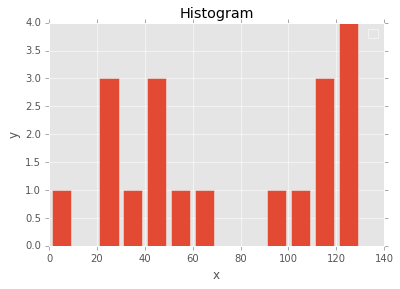

In [29]:
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,120,121,122,130,111,115]
bins=[0,10,20,30,40,50,60,70,80,90,100, 110,120,130]
plt.hist(population_ages, bins, histtype='bar', rwidth=0.8)
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Scatter Plot

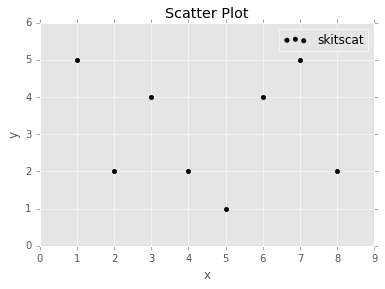

In [30]:
x=[1,2,3,4,5,6,7,8]
y=[5,2,4,2,1,4,5,2]
plt.scatter(x,y, label='skitscat', color='k')
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Stack Plot

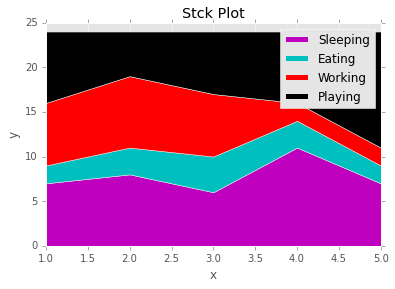

In [32]:
days=[1,2,3,4,5]
sleeping=[7,8,6,11,7]
eating=[2,3,4,3,2]
working=[7,8,7,2,2]
playing=[8,5,7,8,13]
plt.plot([],[],color= 'm', label='Sleeping', linewidth=5)
plt.plot([],[],color= 'c', label='Eating', linewidth=5)
plt.plot([],[],color= 'r', label='Working', linewidth=5)
plt.plot([],[],color= 'k', label='Playing', linewidth=5)
plt.stackplot(days,sleeping,eating,working,playing, colors= ['m', 'c', 'r', 'k'])
plt.title('Stck Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()